<a href="https://colab.research.google.com/github/Sanjero20/LE2_SANTOS_AN/blob/main/LE2_SANTOS_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def check_metrics(test, prediction):
  accuracy = accuracy_score(y_test, prediction)
  precision = precision_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  f1 = f1_score(y_test, prediction, average="macro")

  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

  return accuracy

Training models

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, max_iter=5000)
lr.fit(X_train, y_train.values.ravel())

prediction = lr.predict(X_test)
lr_acc = check_metrics(y_test, prediction)

Accuracy: 0.5348717948717949
Precision: 0.224893219572496
Recall: 0.214916403003534
F1 Score: 0.2113054349572568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train.values.ravel())

prediction = svm.predict(X_test)
svm_acc = check_metrics(y_test, prediction)

Accuracy: 0.5584615384615385
Precision: 0.23892663827057387
Recall: 0.22380453617520743
F1 Score: 0.22004799389035887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

prediction = rf.predict(X_test)
rf_acc = check_metrics(y_test, prediction)

Accuracy: 0.6692307692307692
Precision: 0.5183141373075757
Recall: 0.3464325890463554
F1 Score: 0.3786027415692068


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

prediction = knn.predict(X_test)
knn_acc = check_metrics(y_test, prediction)

Accuracy: 0.5456410256410257
Precision: 0.33742261027834447
Recall: 0.2887848805476708
F1 Score: 0.30214582250145644


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visualizing each model's accuracy

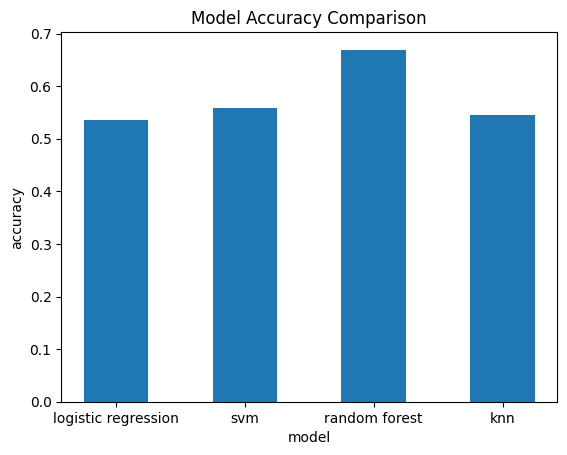

In [10]:
import matplotlib.pyplot as plt

models = ['logistic regression', 'svm', 'random forest', 'knn']
accuracies = [lr_acc, svm_acc, rf_acc, knn_acc]

plt.title("Model Accuracy Comparison")
plt.xlabel('model')
plt.ylabel('accuracy')

plt.bar(models, accuracies, width=0.5)

plt.show()

The graphs shows that in terms of accuracy, Random Forest model performs the best.

In [11]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=10, learning_rate=1, base_estimator=rf)
ada.fit(X_train, y_train)

prediction = ada.predict(X_test)
ada_acc= check_metrics(y_test, prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6671794871794872
Precision: 0.5250570172065572
Recall: 0.3502374113641616
F1 Score: 0.38296713626249684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print("Accuracy")
print("Random Forest:\t", rf_acc)
print("Adaboost:\t", ada_acc )

Accuracy
Random Forest:	 0.6692307692307692
Adaboost:	 0.6671794871794872
